# Edge detection

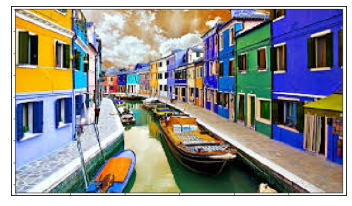

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('burano.png')
imgplot = plt.imshow(img)
plt.show(plt.xticks([]), plt.yticks([])) 

To perform edge detection we first have to compute the gradient image. To do this we have to read the color image in graylevel.

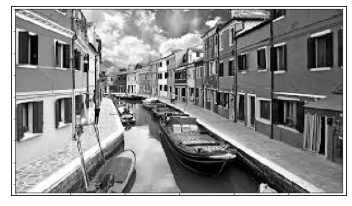

In [ ]:
#convert the color image in grayscale
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap = 'gray');
plt.show(plt.xticks([]), plt.yticks([]))

and apply the Sobel operator with 3x3 kernel to compute the gradient Gx and Gy

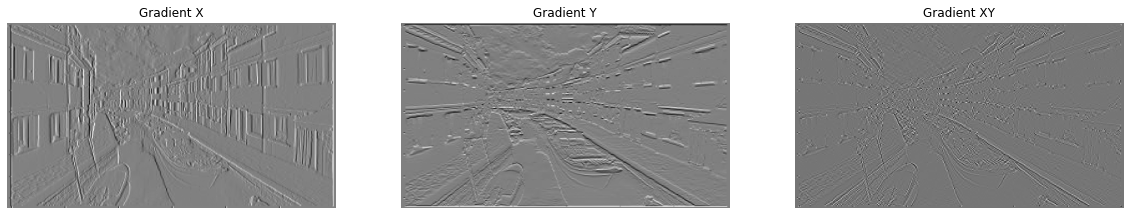

In [ ]:
#The second argument is the depth of the output image. 
#We set it to CV_64F=4bit
gradx = cv2.Sobel(img_gray,cv2.CV_64F, dx = 1, dy = 0,ksize=3)
grady = cv2.Sobel(img_gray,cv2.CV_64F, dx = 0, dy = 1,ksize=3)
gradxy = cv2.Sobel(img_gray,cv2.CV_64F, dx = 1, dy = 1,ksize=3) 

fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
ax1.imshow(gradx,cmap = 'gray')
ax1.set_title('Gradient X')
ax1.set_axis_off()
ax2.imshow(grady,cmap = 'gray')
ax2.set_title('Gradient Y')
ax2.set_axis_off()
ax3.imshow(gradxy,cmap = 'gray')
ax3.set_title('Gradient XY')
ax3.set_axis_off()
plt.show()

Now let's compute the gradient magnitude

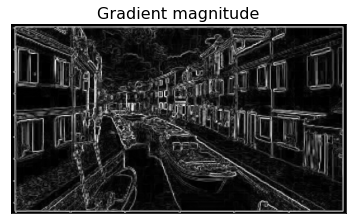

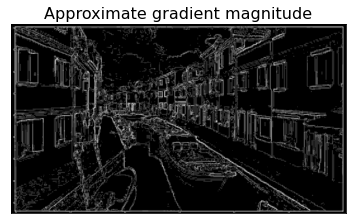

In [ ]:
grad=cv2.magnitude(gradx, grady) #computes sqrt(gradx**2 + grady**2)
plt.imshow(grad,cmap = 'gray')
plt.title('Gradient magnitude', fontdict={'fontsize':16})
plt.show(plt.xticks([]), plt.yticks([]))

#compute approximation of magnitude |gradx| + |grady|
abs_gradx = cv2.convertScaleAbs(gradx)
abs_grady = cv2.convertScaleAbs(grady)
grad1=abs_gradx+abs_grady

plt.title('Approximate gradient magnitude', fontdict={'fontsize':16})
plt.imshow(grad1,cmap = 'gray')
plt.show(plt.xticks([]), plt.yticks([]))  

the result of sobel operator should be processed further to derive thin edges

#Edge detection with Canny
OpenCV also offers a function for the Canny (after the algorithm's inventor,
John F. Canny) edge detector, which is very popular not only because of its effectiveness, but also the simplicity of its implementation.

In [ ]:
# The Sobel kernel size by default is 3

#changing the threshold of the detector will affect the edges 
edge_img=cv2.Canny(img_gray, 300, 400) # set the two thresholds 
imgplot = plt.imshow(edge_img,cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))

edge_img=cv2.Canny(img_gray, 30, 50)
imgplot = plt.imshow(edge_img,cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))

edge_img=cv2.Canny(img_gray, 100, 250)
imgplot = plt.imshow(edge_img,cmap='gray')
plt.show(plt.xticks([]), plt.yticks([]))

error: ignored